<a href="https://colab.research.google.com/github/divas-jindal/AI_IG/blob/master/Week%200/WEEK_0_CODING_ASST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


df_meal= pd.read_csv("./data/meal_info.csv")
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [71]:
df_center=pd.read_csv("./data/fulfilment_center_info.csv")
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [72]:
df_food=pd.read_csv('./data/train.csv')
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [73]:
df=pd.merge(df_center,df_food,on='center_id')
df=pd.merge(df,df_meal,on='meal_id')
df

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,11,679,56,TYPE_A,3.7,1103215,1,1885,136.83,136.83,0,0,959,Beverages,Thai
1,11,679,56,TYPE_A,3.7,1091356,2,1885,133.86,135.86,0,0,1054,Beverages,Thai
2,11,679,56,TYPE_A,3.7,1195933,3,1885,135.86,133.86,0,0,891,Beverages,Thai
3,11,679,56,TYPE_A,3.7,1425602,4,1885,134.86,135.86,0,0,1107,Beverages,Thai
4,11,679,56,TYPE_A,3.7,1249127,5,1885,146.53,146.53,0,0,919,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,51,638,56,TYPE_A,7.0,1299079,141,2104,592.73,590.73,0,0,94,Fish,Continental
456544,51,638,56,TYPE_A,7.0,1476667,142,2104,590.73,592.73,0,0,42,Fish,Continental
456545,51,638,56,TYPE_A,7.0,1145930,143,2104,590.73,590.73,0,0,42,Fish,Continental
456546,51,638,56,TYPE_A,7.0,1421507,144,2104,591.73,590.73,0,0,54,Fish,Continental


In [74]:
table= pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


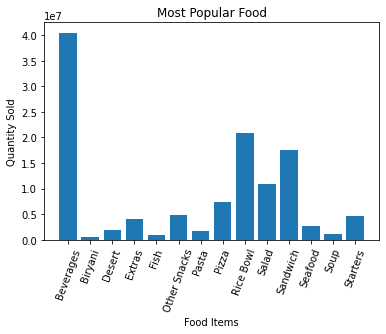

<Figure size 432x288 with 0 Axes>

In [75]:
x= table.index
y= table['num_orders']
plt.xticks(rotation=70)
plt.xlabel('Food Items')
plt.ylabel('Quantity Sold')
plt.title('Most Popular Food')
plt.bar(x,y)
plt.show()
plt.savefig('bar1.png')

In [76]:
df['revenue']=df['checkout_price']*df['num_orders']
df.head()

,center_id,city_code,region_code,center_type,op_area,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,revenue
0,11,679,56,TYPE_A,3.7,1103215,1,1885,136.83,136.83,0,0,959,Beverages,Thai,131219.97
1,11,679,56,TYPE_A,3.7,1091356,2,1885,133.86,135.86,0,0,1054,Beverages,Thai,141088.44
2,11,679,56,TYPE_A,3.7,1195933,3,1885,135.86,133.86,0,0,891,Beverages,Thai,121051.26
3,11,679,56,TYPE_A,3.7,1425602,4,1885,134.86,135.86,0,0,1107,Beverages,Thai,149290.02
4,11,679,56,TYPE_A,3.7,1249127,5,1885,146.53,146.53,0,0,919,Beverages,Thai,134661.07


In [0]:
df['month']=df['week']//4


In [78]:
month=df.month.unique()
month
month_table = pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)
month_order=np.array(month_table)
month_order

array([[5.96466615e+08],
       [8.76888611e+08],
       [7.74468112e+08],
       [7.01899577e+08],
       [7.83155486e+08],
       [7.82544848e+08],
       [7.91166666e+08],
       [7.62220018e+08],
       [8.05582345e+08],
       [9.04320530e+08],
       [8.38613975e+08],
       [9.05856454e+08],
       [9.37185512e+08],
       [1.00238049e+09],
       [8.95080549e+08],
       [8.76138989e+08],
       [8.46857744e+08],
       [1.00522602e+09],
       [8.74101314e+08],
       [8.99496785e+08],
       [8.49758487e+08],
       [8.64860334e+08],
       [8.55313124e+08],
       [9.68392682e+08],
       [8.06507047e+08],
       [9.55163254e+08],
       [8.92146585e+08],
       [1.03487485e+09],
       [9.60853137e+08],
       [8.86351353e+08],
       [9.69645040e+08],
       [8.65023600e+08],
       [9.98586851e+08],
       [9.87017508e+08],
       [8.27803177e+08],
       [9.19239641e+08],
       [4.21583732e+08]])

In [79]:
week= df.week.unique()
week
week_table= pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
week_order=np.array(week_table)
len(week_order)

145

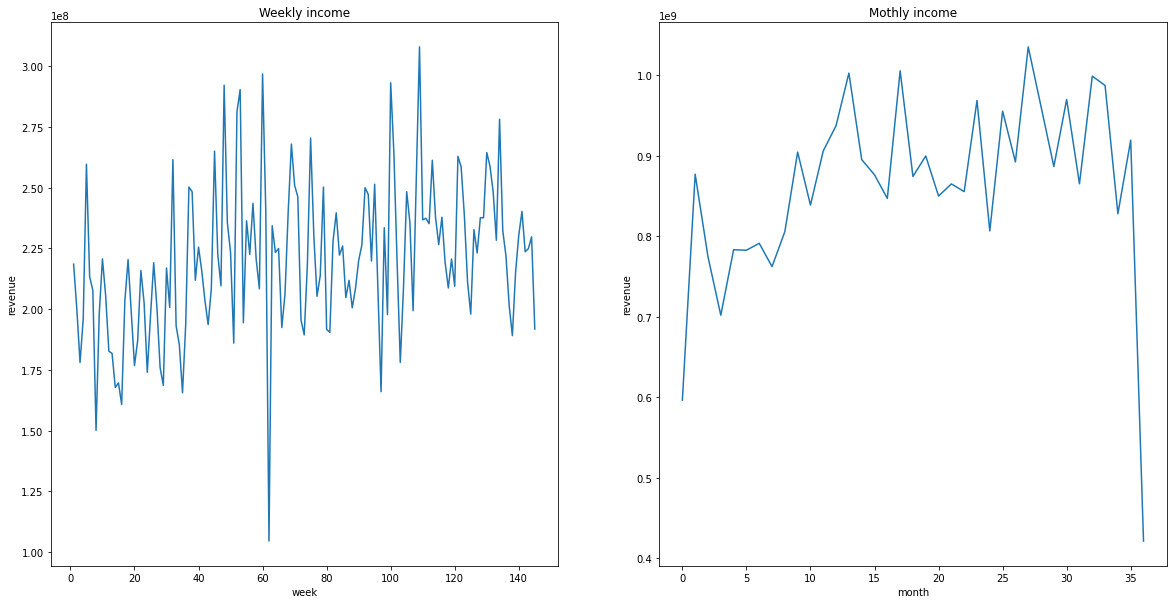

In [80]:
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.plot(week,week_order)
ax1.set_title('Weekly income')
ax1.set_xlabel('week')
ax1.set_ylabel('revenue')
ax2.plot(month,month_order)

ax2.set_title('Mothly income')
ax2.set_xlabel('month')
ax2.set_ylabel('revenue')
plt.savefig('revenue.png')